## Latar Belakang
AWS merupakan perusahan yang merupakan bagian dari Amazon yang berfokus pada penyediaan teknologi cloud terdepan di dunia yang membantu setiap organisasi dan individu membangun solusi untuk mengubah industri, komunitas, dan kehidupan menjadi lebih baik[klik disini](https://aws.amazon.com/about-aws/). AWS menawarkan produk salah satunya yaitu SaaS [klik disini](https://en.wikipedia.org/wiki/Amazon_Web_Services).  **SaaS** memungkinkan penggunaan aplikasi perangkat lunak sebagai layanan kepada pengguna akhir. Contoh Software-as-a-Service (SaaS) antara lain Adobe, Google, Salesforce, Cisco, SAP, Microsoft, dan Oracle [(Saraswat, 2020)](https://sci-hub.se/https://ieeexplore.ieee.org/abstract/document/9337100).

perusahaan aws sedang melakukan evaluasi tahunan terhadap penjualan mereka, hal ini mencakp penjualan, profit, dan margin profit. pada evaluasi tahun 2023 terjadi penurunan profit margin yang dimana profit margin bisa menjadikan indikator kesehatan suatu bisnis.

## Pernyataan masalah
Perusahaan ingin mengetahui faktor apa saja yang menyebabkan penurunan profit perusahaan agar pada tahun selanjutnya perusahaan dapat memperbaiki permasalahan tersebut sehingga tidak terjadi lagi penurunan margin tersebut.

Sebagai data analyst, kita mencoba menjawab pertanyaan tersebut

## Data
Data ini mencakup 19 kolom dan terdiri dari 9,994 baris

### **Deskripsi Kolom**


| **Nama Kolom** | **Deskripsi Kolom**                                   |
| ---------------- | -------------------------------------------------------- |
| **Row ID**       | Kode uniqe setiap transaksi               |
| **Order ID**     | kode uniqe setiap order                     |
| **Order Date**   | waktu ketika melakukan order                     |
| **Date Key**     | representasi numerikal dari order date (YYYYMMDD). |
| **Contact Name** | nama orang yang melakukan pemesanan             |
| **Country**      | negara dimana pembeli berada                  |
| **City**         | kota dimana pembeli berada                    |
| **Region**       | region dimana pembeli berada                   |
| **Subregion**    | subregion dimana pembeli berasal               |
| **Customer**     | nama perusahaan pembeli          |
| **Customer ID**  | kode uniqe customer.                  |
| **Industry**     | jenis industri dari customer.                    |
| **Segment**      | segment dari customer (SMB, Strategic, Enterprise, etc.). |
| **Product**      | Jenis product yang dibeli.                                 |
| **License**      | Lisensi dari product                          |
| **Sales**        | Jumlah total penjualan untuk transaksi tersebut.              |
| **Quantity**     | Jumlah total item dalam transaksi             |
| **Discount**     | Diskon yang diterapkan pada transaksi.                 |
| **Profit**       | Keuntungan dari transaksi.                         |

## Load Data And Preparation Data

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')


df=pd.read_csv('SaaS-Sales.csv')
display(df.info(),df.head(),df[df.duplicated()])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Row ID        9994 non-null   int64  
 1   Order ID      9994 non-null   object 
 2   Order Date    9994 non-null   object 
 3   Date Key      9994 non-null   int64  
 4   Contact Name  9994 non-null   object 
 5   Country       9994 non-null   object 
 6   City          9994 non-null   object 
 7   Region        9994 non-null   object 
 8   Subregion     9994 non-null   object 
 9   Customer      9994 non-null   object 
 10  Customer ID   9994 non-null   int64  
 11  Industry      9994 non-null   object 
 12  Segment       9994 non-null   object 
 13  Product       9994 non-null   object 
 14  License       9994 non-null   object 
 15  Sales         9994 non-null   float64
 16  Quantity      9994 non-null   int64  
 17  Discount      9994 non-null   float64
 18  Profit        9994 non-null 

None

,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
0,1,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,16GRM07R1K,261.9600,2,0.00,41.9136
1,2,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,FinanceHub,QLIW57KZUV,731.9400,3,0.00,219.5820
2,3,AMER-2022-138688,6/13/2022,20220613,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,1056,Energy,Strategic,FinanceHub,JI6BVL70HQ,14.6200,2,0.00,6.8714
3,4,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,ContactMatcher,DE9GJKGD44,957.5775,5,0.45,-383.0310
4,5,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,Marketing Suite - Gold,OIF7NY23WD,22.3680,2,0.20,2.5164


,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit


1. jumlah data terdiri dari 9994 baris dan 19 kolom
2. kolom order date berbentuk object seharusnya berbentuk datetime dan kita harus mengubahnya
3. kolom Customer ID berbentuk int seharusnya berbentuk object
3. tidak ada missing value 
4. tidak ada baris yang duplicate

**Ubah jenis data object menjadi datetime pada kolom order date, dan ubah customer ID menjadi object**

In [60]:
df['Order Date']=df['Order Date'].apply(pd.to_datetime)
df['Customer ID']=df['Customer ID'].astype('str')

**Drop kolom**
1. drop kolom row id karena sama saja dengan index 
2. date key karena sama dengan order date
3. license karena merupakan lisensi dari produk dan tidak diperlukan saat melakukan analisis

In [61]:
df.drop(columns=['Row ID','Date Key','License'],inplace=True)

In [62]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
pd.DataFrame({
    'Name': df.columns.values,
    'Type': df.dtypes.values,
    'N/A (%)': df.isna().mean().values * 100,
    'Unique': df.nunique().values,
    'Sample': [df[col].unique() for col in df.columns]
})

,Name,Type,N/A (%),Unique,Sample
0,Order ID,object,0.0,5009,"[EMEA-2022-152156, AMER-2022-138688, EMEA-2021-108966, AMER-2020-115812, EMEA-2023-114412, AMER-2022-161389, APJ-2021-118983, EMEA-2020-105893, EMEA-2020-167164, AMER-2020-143336, AMER-2022-137330, EMEA-2023-156909, EMEA-2021-106320, AMER-2022-121755, EMEA-2021-150630, APJ-2023-107727, APJ-2022-117590, APJ-2021-117415, APJ-2023-120999, AMER-2022-101343, EMEA-2023-139619, EMEA-2022-118255, AMER-2020-146703, APJ-2022-169194, APJ-2021-115742, EMEA-2022-105816, EMEA-2022-111682, AMER-2021-135545, APJ-2021-164175, AMER-2020-106376, EMEA-2022-119823, EMEA-2022-106075, AMER-2023-114440, EMEA-2021-134026, APJ-2023-118038, APJ-2020-147606, EMEA-2022-127208, AMER-2020-139451, EMEA-2021-149734, APJ-2023-119662, AMER-2023-140088, EMEA-2023-155558, APJ-2022-159695, AMER-2022-109806, EMEA-2021-149587, EMEA-2023-109484, EMEA-2023-161018, AMER-2023-157833, EMEA-2022-149223, APJ-2022-158568, EMEA-2022-129903, EMEA-2021-156867, EMEA-2023-119004, APJ-2021-129476, EMEA-2023-146780, EMEA-2022-128867, AMER-2020-115259, AMER-2021-110457, EMEA-2021-136476, APJ-2022-103730, APJ-2020-152030, APJ-2020-134614, AMER-2023-107272, AMER-2022-125969, AMER-2023-164147, AMER-2022-145583, EMEA-2022-110366, AMER-2023-106180, EMEA-2023-155376, AMER-2021-110744, AMER-2020-110072, EMEA-2022-114489, AMER-2022-158834, AMER-2021-124919, AMER-2021-118948, AMER-2020-104269, APJ-2022-114104, AMER-2022-162733, EMEA-2021-119697, APJ-2022-154508, AMER-2022-113817, APJ-2020-139892, AMER-2020-118962, APJ-2020-100853, APJ-2023-152366, AMER-2021-101511, EMEA-2021-137225, APJ-2020-166191, EMEA-2020-158274, EMEA-2022-105018, AMER-2020-123260, APJ-2022-157000, EMEA-2021-102281, AMER-2021-131457, AMER-2020-140004, AMER-2023-107720, EMEA-2023-124303, AMER-2023-105074, EMEA-2020-133690, APJ-2023-116701, ...]"
1,Order Date,datetime64[ns],0.0,1237,"[2022-11-09 00:00:00, 2022-06-13 00:00:00, 2021-10-11 00:00:00, 2020-06-09 00:00:00, 2023-04-16 00:00:00, 2022-12-06 00:00:00, 2021-11-22 00:00:00, 2020-11-11 00:00:00, 2020-05-13 00:00:00, 2020-08-27 00:00:00, 2022-12-10 00:00:00, 2023-07-17 00:00:00, 2021-09-25 00:00:00, 2022-01-16 00:00:00, 2021-09-17 00:00:00, 2023-10-20 00:00:00, 2022-12-09 00:00:00, 2021-12-27 00:00:00, 2023-09-11 00:00:00, 2022-07-18 00:00:00, 2023-09-20 00:00:00, 2022-03-12 00:00:00, 2020-10-20 00:00:00, 2022-06-21 00:00:00, 2021-04-18 00:00:00, 2022-12-12 00:00:00, 2022-06-18 00:00:00, 2021-11-24 00:00:00, 2021-04-30 00:00:00, 2020-12-05 00:00:00, 2022-06-05 00:00:00, 2022-09-19 00:00:00, 2023-09-15 00:00:00, 2021-04-26 00:00:00, 2023-12-10 00:00:00, 2020-11-26 00:00:00, 2020-10-12 00:00:00, 2021-09-03 00:00:00, 2023-11-14 00:00:00, 2023-05-29 00:00:00, 2023-10-27 00:00:00, 2022-04-06 00:00:00, 2022-09-18 00:00:00, 2021-01-31 00:00:00, 2023-11-07 00:00:00, 2023-11-10 00:00:00, 2023-06-18 00:00:00, 2022-09-07 00:00:00, 2022-08-30 00:00:00, 2022-12-02 00:00:00, 2021-11-13 00:00:00, 2023-11-24 00:00:00, 2021-10-15 00:00:00, 2023-12-26 00:00:00, 2022-11-04 00:00:00, 2020-08-25 00:00:00, 2021-03-02 00:00:00, 2021-04-05 00:00:00, 2020-12-26 00:00:00, 2020-09-20 00:00:00, 2023-11-06 00:00:00, 2022-11-07 00:00:00, 2023-02-03 00:00:00, 2022-10-14 00:00:00, 2022-09-06 00:00:00, 2023-09-19 00:00:00, 2023-12-23 00:00:00, 2021-09-07 00:00:00, 2020-10-22 00:00:00, 2022-03-14 00:00:00, 2021-05-31 00:00:00, 2021-05-28 00:00:00, 2020-03-01 00:00:00, 2022-11-21 00:00:00, 2022-05-12 00:00:00, 2021-12-28 00:00:00, 2022-11-17 00:00:00, 2022-11-08 00:00:00, 2020-09-08 00:00:00, 2020-08-05 00:00:00, 2020-09-14 00:00:00, 2023-04-22 00:00:00, 2021-11-21 00:00:00, 2021-12-15 00:00:00, 2020-11-19 00:00:00, 2022-11-29 00:00:00, 2020-08-26 00:00:00, 2022-07-17 00:00:00, 2021-10-12 00:00:00, 2021-10-31 00:00:00, 2020-03-21 00:00:00, 2023-07-07 00:00:00, 2023-06-25 00:00:00, 2020-08-03 00:00:00, 2023-12-18 00:00:00, 2023-06-04 00:00:00, 2023-12-02 00:00:00, 2021-02-09 00:00:00, 2021-01-02 00:00:00, 2022-10-29 00:00:00, ...]"
2,Contact Na

## Simpan Data ke excel

In [63]:
#df.to_excel('final_data_saas.xlsx',index=False) 

## Data Analysis
Analysis dilakukan untuk mengetahui faktor apa saja yang mempengaruhi penurunan profit margin yang terjadi pada tahun 2023, dimana hal ini dapat mencakup dampak diskon terhadap penjualan dan profit

## Kinerja Penjualan
* bagaimana sales tiap tahun
* bagaimana profit yang didapat tiap tahun
* bagaimana profit margin tiap tahun

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_13472\2724387857.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales['Year']=sales['Order Date'].dt.year


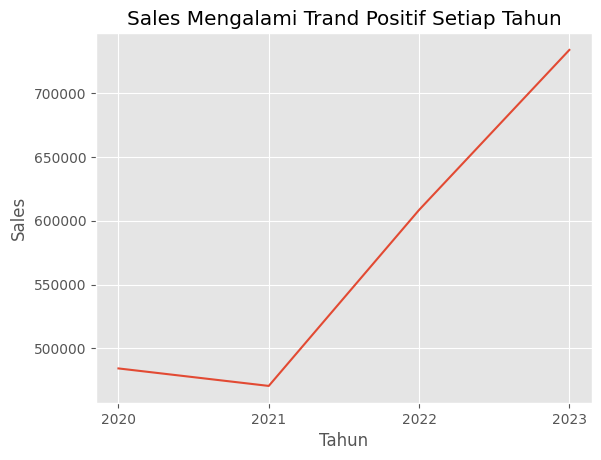

In [88]:
sales=df[['Order Date','Sales']]
sales['Year']=sales['Order Date'].dt.year
sales=sales.groupby('Year')['Sales'].sum().reset_index()

plt.plot(sales['Year'],sales['Sales'])
plt.xticks(sales['Year'])
plt.title('Sales Mengalami Trand Positif Setiap Tahun')
plt.xlabel('Tahun')
plt.ylabel('Sales')

plt.show()



C:\Users\LENOVO\AppData\Local\Temp\ipykernel_13472\2463747942.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  profit['Year']=profit['Order Date'].dt.year


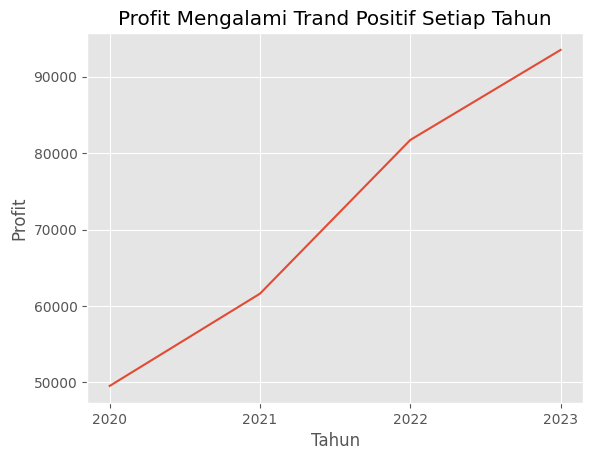

In [89]:
profit=df[['Order Date','Profit']]
profit['Year']=profit['Order Date'].dt.year
profit=profit.groupby('Year')['Profit'].sum().reset_index()

plt.plot(profit['Year'],profit['Profit'])
plt.xticks(profit['Year'])
plt.title('Profit Mengalami Trand Positif Setiap Tahun')
plt.xlabel('Tahun')
plt.ylabel('Profit')
plt.show()


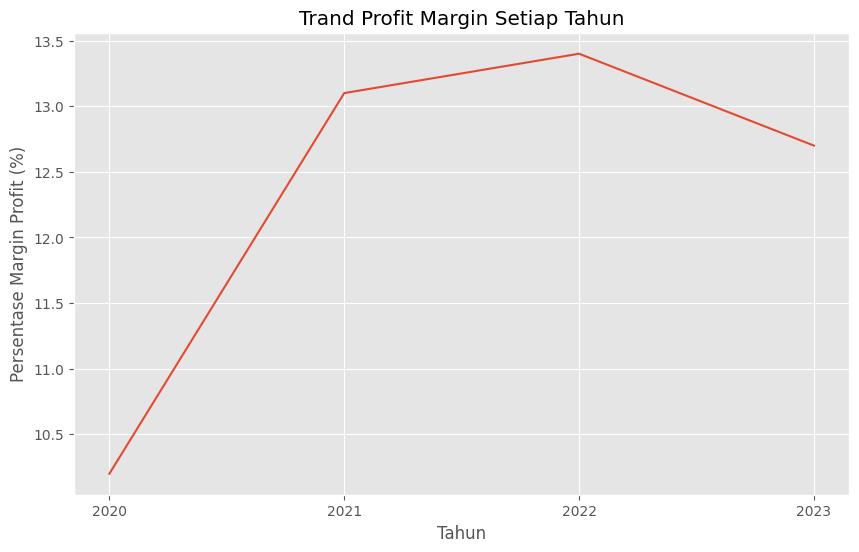

In [90]:
df['Year']=df['Order Date'].dt.year
margin=df.groupby('Year').agg({'Sales':'sum','Profit':'sum'}).reset_index()
margin['margin']=round((margin['Profit']/margin['Sales'])*100,1)

plt.figure(figsize=(10,6))
plt.plot(margin['Year'],margin['margin'])
plt.xticks(margin['Year'])
plt.title('Trand Profit Margin Setiap Tahun')
plt.xlabel('Tahun')
plt.ylabel('Persentase Margin Profit (%)')
plt.show()

Dari grafik diatas kita mengetahui terdapat trand positif sales dan profit tiap tahun,margin pada tahun 2020 sampai tahun 2022 mengalai trand positif dan pada 2023 mengalami penurunan profit margin 

kita coba melihat faktor penyebab  penurunan profit margin dari sisi discount pada tahun 2023. Apakah ada produk yang menyumbang profit negatif pada tahun 2023


In [67]:
mask=df['Order Date'].dt.year==2023
df23=df[mask]

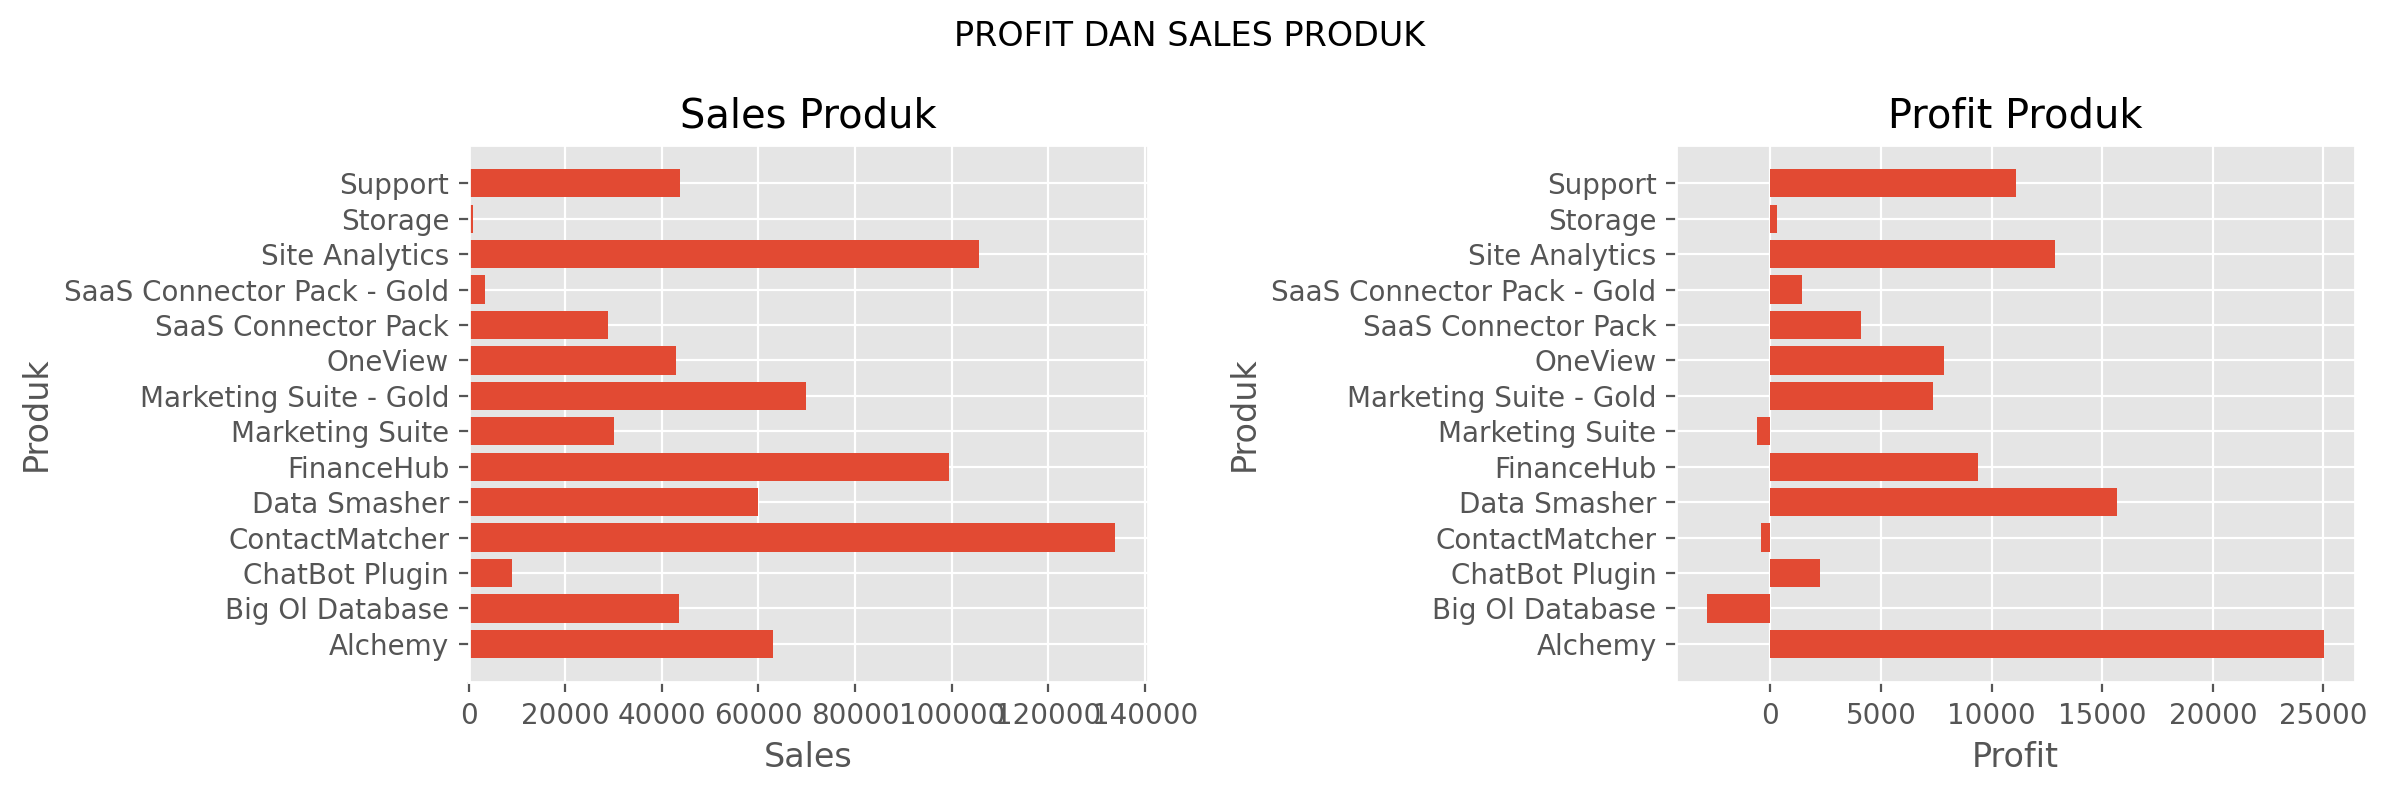

In [91]:
profit_product=df23.groupby('Product')['Profit'].sum().reset_index()
sales_product=df23.groupby('Product')['Sales'].sum().reset_index()

plt.figure(figsize=(12, 4), dpi=200)
# Sales Produk
plt.subplot(1,2,1)
plt.barh(sales_product['Product'],sales_product['Sales'])
plt.title('Sales Produk')
plt.xlabel('Sales')
plt.ylabel('Produk')

#Profit Produk
plt.subplot(1,2,2)
plt.barh(profit_product['Product'],profit_product['Profit'])
plt.title('Profit Produk')
plt.xlabel('Profit')
plt.ylabel('Produk')

plt.suptitle('PROFIT DAN SALES PRODUK')
plt.tight_layout()
plt.show()

* Terdapat 3 produk yang menyumbang profit negatif perusahaan pada 2023 yaitu Big OI Database,Contact Matcher, dan Marketing Suite. 
* Sales terbesar disumbang oleh Contact Matcher
* Profit terbesar disumbang oleh product Alchemy

Produk dengan profit negatif, yang berarti biaya operasional melebihi pendapatan dari penjualan produk tersebut, hal ini dapat berdampak signifikan terhadap penurunan profit margin perusahaan secara keseluruhan. Ketika sebuah produk tidak menghasilkan keuntungan atau malah merugi, ini mengurangi total laba bersih yang dapat dikontribusikan ke profit margin perusahaan.

terdapat beberapa penyebab produk mengalami negatif profit, salah satunya yaitu melakukan pengecekan terhadap strategi pemberian diskon. 
* apakah ada korelasi antara sales dengan diskon
* apakah terdapat korelasi antara profit dengan diskon

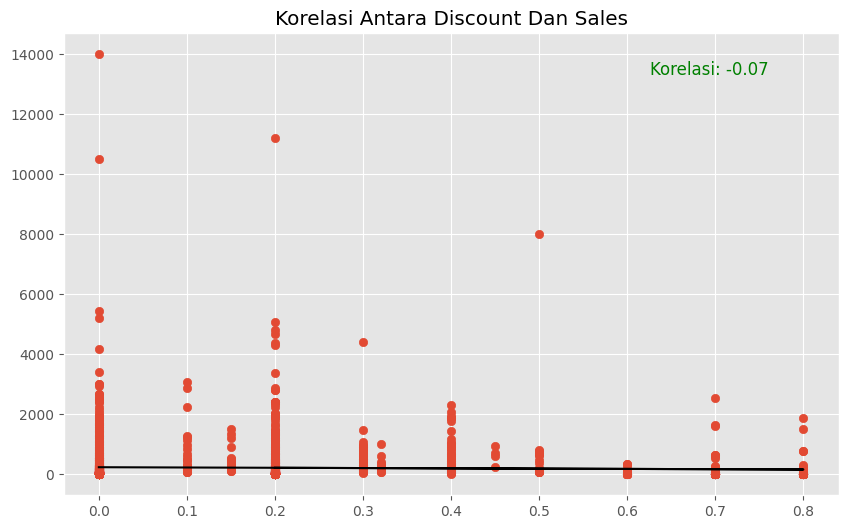

In [92]:
core=df23[['Sales','Discount','Profit']]
corelation = core[['Sales', 'Discount']].corr(method='spearman').loc['Discount','Sales']

plt.figure(figsize=(10,6))
plt.scatter(core['Discount'],core['Sales'])
plt.title('Korelasi Antara Discount Dan Sales')

# Line
m , b= np.polyfit(core['Discount'],core['Sales'],1)
plt.plot((core['Discount']), m*np.array(core['Discount']) + b, c='black', label=f"Trend Line (y={m:.2f}x + {b:.2f})")

#correlation, _ = spearmanr(core['Discount'], core['Sales'])
x_pos = max(core['Discount']) * 0.95  # 95% dari maksimum x
y_pos = max(core['Sales']) * 0.95  # 95% dari maksimum y
plt.text(x_pos, y_pos, f"Korelasi: {corelation:.2f}", color="green", fontsize=12, ha='right')

plt.show()


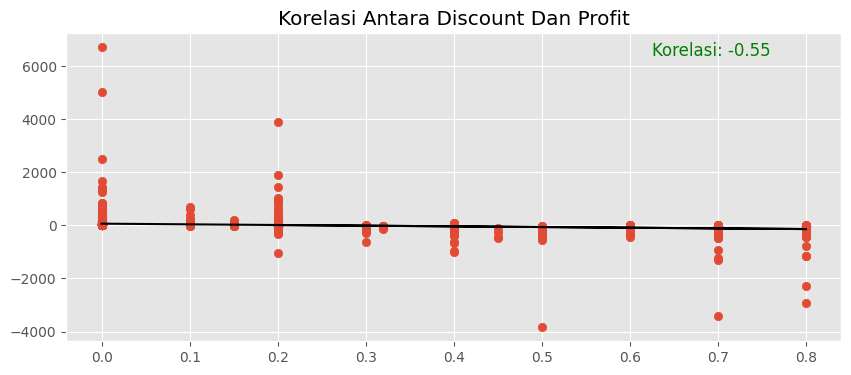

In [93]:
corelation = core[['Profit', 'Discount']].corr(method='spearman').loc['Discount','Profit']

plt.figure(figsize=(10,4))
plt.scatter(core['Discount'],core['Profit'])
plt.title('Korelasi Antara Discount Dan Profit')

# Line
m , b= np.polyfit(core['Discount'],core['Profit'],1)
plt.plot((core['Discount']), m*np.array(core['Discount']) + b, c='black', label=f"Trend Line (y={m:.2f}x + {b:.2f})")

# KOrelasi
x_pos = max(core['Discount']) * 0.95  # 95% dari maksimum x
y_pos = max(core['Profit']) * 0.95  # 95% dari maksimum y
plt.text(x_pos, y_pos, f"Korelasi: {corelation:.2f}", color="green", fontsize=12, ha='right')

plt.show()

dari hasil diatas kita mengetahui bahwa 
* tidak adanya korelasi antara diskon dan sales maka menunjukkan bahawa dengan diberikannya diskon maupun tidak diberikan diskon tidak berpengaruh terhadap sales
* terjadi korelasi negatif antara profit dengan pemberian diskon. Ini bisa disebabkan oleh beberapa faktor:
    * Strategi Diskon: perusahaan memberikan diskon terlalu besar sehingga mengurangi margin keuntungan.
    * Biaya Operasional: Biaya operasional yang tinggi dapat mengurangi keuntungan. hal ini dapat menyebabkan profit negatif pada perusahaan jika penggunaan diskon tidak diperhitungkan dengan baik


Bagaimana korelasi profit dengan diskon pada produk-produk yang menyumbang profit negatif yaitu pada produk Contact Matcher, Big OI Database,dan Marketing Suite

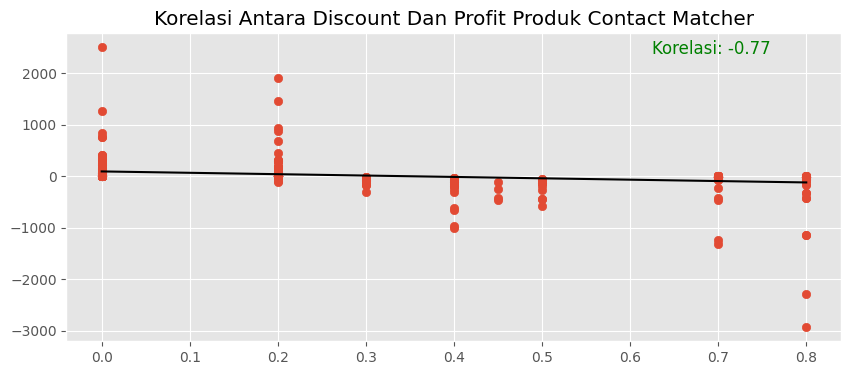

In [94]:
ConMatch=df23[df23['Product']=='ContactMatcher']
ConMatch=ConMatch[['Order Date','Sales','Profit','Discount']]
corelation = ConMatch[['Profit', 'Discount']].corr(method='spearman').loc['Discount','Profit']

plt.figure(figsize=(10,4))
plt.scatter(ConMatch['Discount'],ConMatch['Profit'])
plt.title('Korelasi Antara Discount Dan Profit Produk Contact Matcher')

# Line
m , b= np.polyfit(ConMatch['Discount'],ConMatch['Profit'],1)
plt.plot((ConMatch['Discount']), m*np.array(ConMatch['Discount']) + b, c='black', label=f"Trend Line (y={m:.2f}x + {b:.2f})")

# KOrelasi
x_pos = max(ConMatch['Discount']) * 0.95  # 95% dari maksimum x
y_pos = max(ConMatch['Profit']) * 0.95  # 95% dari maksimum y
plt.text(x_pos, y_pos, f"Korelasi: {corelation:.2f}", color="green", fontsize=12, ha='right')

plt.show()

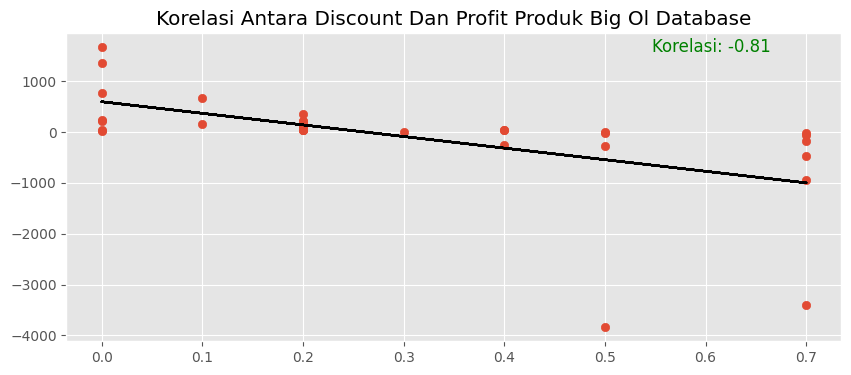

In [95]:
Big_Ol=df23[df23['Product']=='Big Ol Database']
Big_Ol=Big_Ol[['Order Date','Sales','Profit','Discount']]
corelation = Big_Ol[['Profit', 'Discount']].corr(method='spearman').loc['Discount','Profit']

plt.figure(figsize=(10,4))
plt.scatter(Big_Ol['Discount'],Big_Ol['Profit'])
plt.title('Korelasi Antara Discount Dan Profit Produk Big Ol Database')

# Line
m , b= np.polyfit(Big_Ol['Discount'],Big_Ol['Profit'],1)
plt.plot((Big_Ol['Discount']), m*np.array(Big_Ol['Discount']) + b, c='black', label=f"Trend Line (y={m:.2f}x + {b:.2f})")

# KOrelasi
x_pos = max(Big_Ol['Discount']) * 0.95  # 95% dari maksimum x
y_pos = max(Big_Ol['Profit']) * 0.95  # 95% dari maksimum y
plt.text(x_pos, y_pos, f"Korelasi: {corelation:.2f}", color="green", fontsize=12, ha='right')

plt.show()

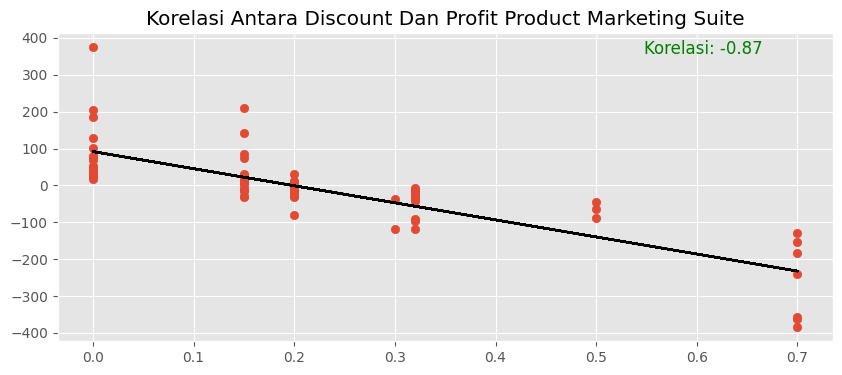

In [96]:
MarketSuite=df23[df23['Product']=='Marketing Suite']
MarketSuite=MarketSuite[['Order Date','Sales','Profit','Discount']]
corelation = MarketSuite[['Profit', 'Discount']].corr(method='spearman').loc['Discount','Profit']

plt.figure(figsize=(10,4))
plt.scatter(MarketSuite['Discount'],MarketSuite['Profit'])
plt.title('Korelasi Antara Discount Dan Profit Product Marketing Suite')

# Line
m , b= np.polyfit(MarketSuite['Discount'],MarketSuite['Profit'],1)
plt.plot((MarketSuite['Discount']), m*np.array(MarketSuite['Discount']) + b, c='black', label=f"Trend Line (y={m:.2f}x + {b:.2f})")

# KOrelasi
x_pos = max(MarketSuite['Discount']) * 0.95  # 95% dari maksimum x
y_pos = max(MarketSuite['Profit']) * 0.95  # 95% dari maksimum y
plt.text(x_pos, y_pos, f"Korelasi: {corelation:.2f}", color="green", fontsize=12, ha='right')

plt.show()

Pada 3 produk yang menyumbang profit negatif memiliki korelasi negatif yang tinggi antara profit dan diskon. 3 produk tersebut memiliki profit negatif dikarenakan pemberian diskon yang tidak di perhitungkan dengan baik. Pemberian diskon lebih dari 20% menyebabkan terjadinya profit negatif pada 3 produk tersebut.

setelah kita lihat dari produk memang terdapat produk yang mengalami profit negatif yang menyebabkan margin perusahaan menurun, kemudian  kita melihat penjualan dari berbagai negara apakah terdapat profit negatif yang dapat menjadikan penyebab profit margin menurun
* Bagaimana sales tiap negara
* apakah terdapat negara yang menyumbang profit negatif bagi perusahaan

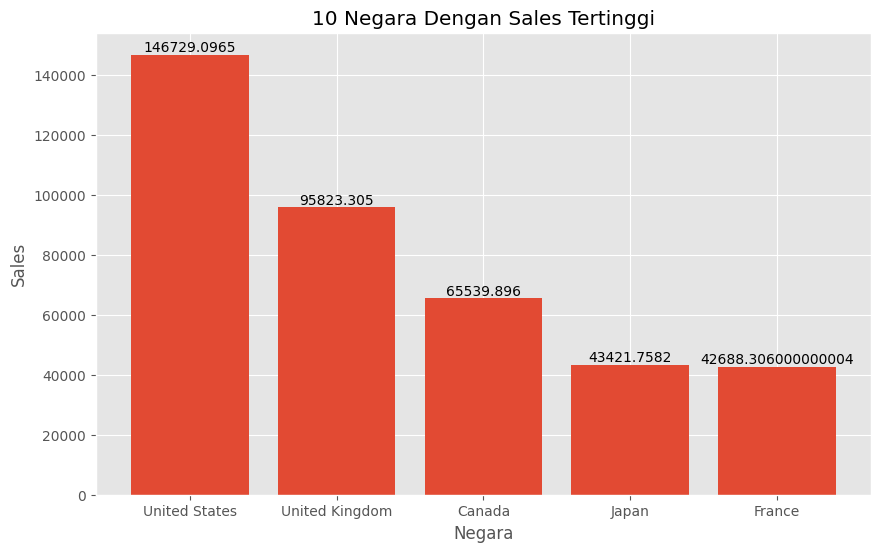

In [74]:
country_sales=df23.groupby(['Country'])[['Sales']].sum().sort_values('Sales', ascending=False).reset_index().head()

# bar + text
plt.figure(figsize=(10,6))
plt.xlabel('Negara')
plt.ylabel('Sales')
plt.bar(country_sales['Country'],country_sales['Sales'], width=0.8)
for i, value in enumerate(country_sales['Sales']):
    plt.text(i, value + 1, f"{value}", ha='center', va='bottom', fontsize=10, color='black')
plt.title('10 Negara Dengan Sales Tertinggi')
plt.show()

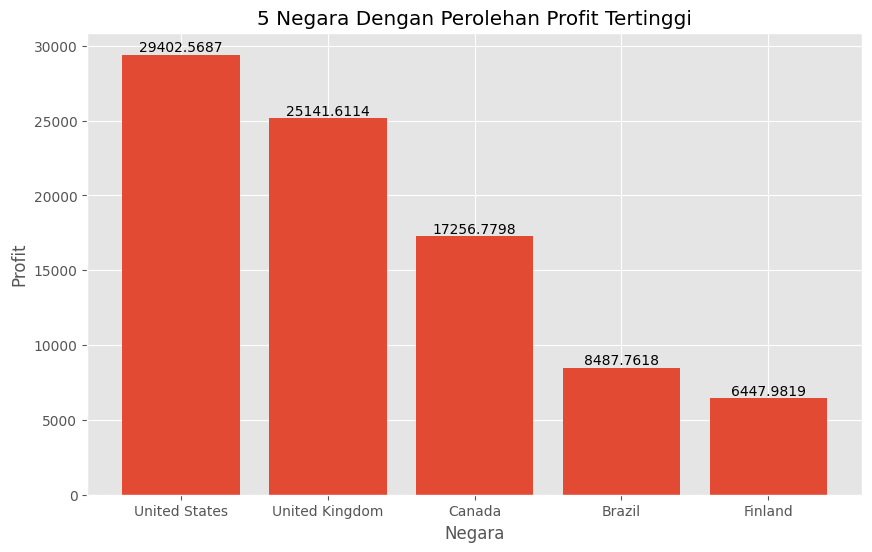

In [97]:
country_profit=df23.groupby(['Country'])[['Profit']].sum().reset_index().sort_values('Profit').nlargest(5,columns=['Profit'])

plt.figure(figsize=(10,6))
plt.bar(country_profit['Country'],country_profit['Profit'])
for i, value in enumerate(country_profit['Profit']):
    plt.text(i, value + 1, f"{value}", ha='center', va='bottom', fontsize=10, color='black')
plt.xlabel('Negara')
plt.ylabel('Profit')
plt.title('5 Negara Dengan Perolehan Profit Tertinggi')
plt.show()

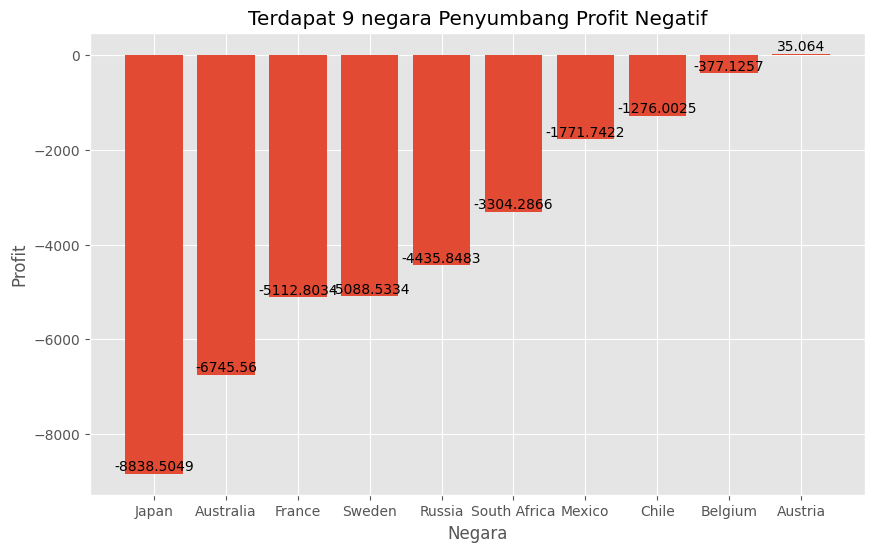

In [98]:
country_profit=df23.groupby(['Country'])[['Profit']].sum().reset_index().sort_values('Profit').head(10)

plt.figure(figsize=(10,6))
plt.bar(country_profit['Country'],country_profit['Profit'])
for i, value in enumerate(country_profit['Profit']):
    plt.text(i, value + 1, f"{value}", ha='center', va='bottom', fontsize=10, color='black')
plt.title('Terdapat 9 negara Penyumbang Profit Negatif')
plt.xlabel('Negara')
plt.ylabel('Profit')
plt.show()


    * Sales tertinggi yaitu pada negara United State dan profit tertinggi juga pada negara united State
    * Terdapat 9 negara yang menyumbang profit negatif yaitu Japan,Australia,France,Sweden,Rusia,Sounth Africa,Mexico,Chile,Belgium. profit negatif ini bisa juga menjadi penyebab menurunnya margin profit perusahaan 

Kita coba lihat salah satu negara dengan profit negatif yaitu japan. Apa saja produk yang banyak terjual di Japan dan apakah terdapat produk yang menyumbangkan profit negatif?

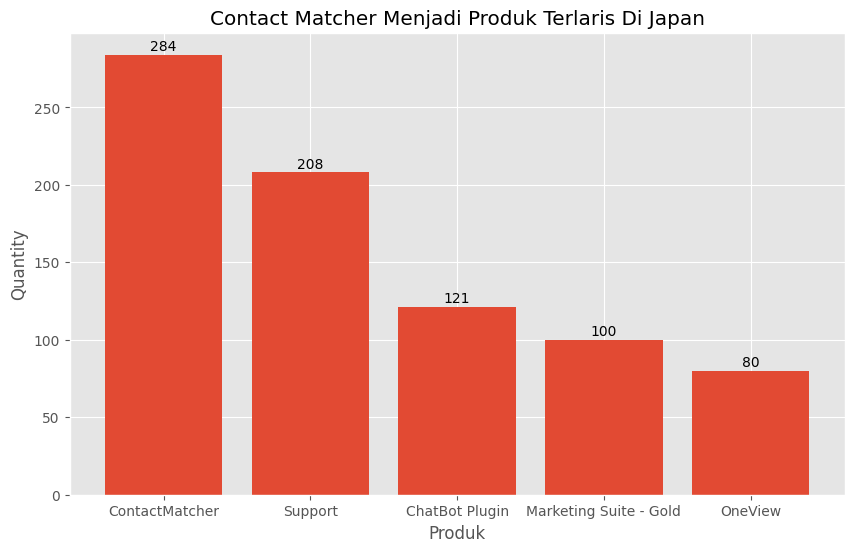

In [99]:
mask=df23[df23['Country']=='Japan']
faktor_japan=mask.groupby('Product')['Quantity'].sum().reset_index().sort_values('Quantity').nlargest(5,columns=['Quantity'])

plt.figure(figsize=(10,6))
plt.bar(faktor_japan['Product'],faktor_japan['Quantity'])
# Menambahkan nilai di atas setiap batang
for i, value in enumerate(faktor_japan['Quantity']):
    plt.text(i, value + 1, f"{value}", ha='center', va='bottom', fontsize=10, color='black')
plt.title('Contact Matcher Menjadi Produk Terlaris Di Japan')
plt.xlabel('Produk')
plt.ylabel('Quantity')
plt.show()

Produk yang paling banyak dibeli diJapan yaitu produk Contact Matcher. Contact matcher merupakan salah satu produk yang menyumbang profit negatif pada perusahaan. Jadi profit negatif yang terjadi di japan disebabkan oleh terjualnya banyak produk yang memiliki profit negatif yaitu Contact Matcher

Setelah kita mengetahui faktor margin profit menurun yang salah satunya disebabkan profit negatif dari suatu produk yang disebabkan oleh discount maka untuk menangani hal tersebut kita perlu melakukan startegi promosi lain. untuk menetapkan strategi promosi lain kita peru melakukan pembagian berdasarkan segmentasi pembeli perusahaan 


Segment apa saja yang membeli produk terbanyak, hal ini dapat digunakan untuk mengetahui segment apa saja yang bisa kita optimalkan dalam penjualan.

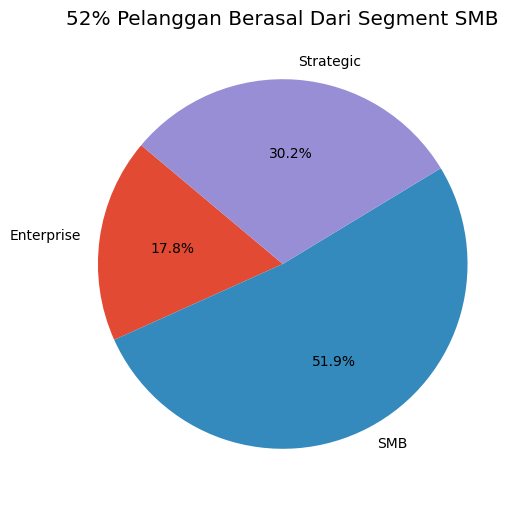

In [100]:
segment=df.groupby('Segment')['Segment'].count().to_frame().reset_index(names='Segmen')
segment.rename(columns={'Segment':'Jumlah'},inplace=True)
total=segment['Jumlah'].sum()
segment['Persentase']=round((segment['Jumlah']/total),3)

# pie + text
plt.figure(figsize=(10,6))
plt.pie(segment['Jumlah'],labels=segment['Segmen'],autopct='%1.1f%%',startangle=140)
plt.title('52% Pelanggan Berasal Dari Segment SMB')
plt.show()


Pembeli terbanyak yaitu pada segment SMB dengan presentase 52%

setelah mengetahui segment pembeli terbanyak kemudian kita harus mengetahui wilayah berupa region dan negara mana saja yang merupakan pembeli terbanyak pada perusahaan 

In [ ]:

region_grup

,region,Jumlah,Persentase
0,AMER,3665,36.7
1,APJ,2110,21.1
2,EMEA,4219,42.2


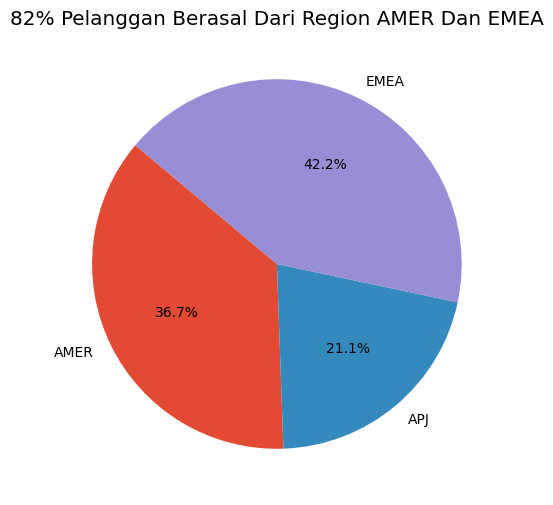

In [101]:
region_grup=df.groupby('Region')['Region'].count().to_frame().reset_index(names='region')
region_grup.rename(columns={'Region':'Jumlah'},inplace=True)
total=region_grup['Jumlah'].sum()
region_grup['Persentase']=round((region_grup['Jumlah']/total)*100,1)

plt.figure(figsize=(10,6))
plt.pie(region_grup['Jumlah'], labels=region_grup['region'], autopct='%1.1f%%',startangle=140)
plt.title('82% Pelanggan Berasal Dari Region AMER Dan EMEA')
plt.show()


Pembeli didominasi dari EMEA dan AMER dengan presentase 42% dan 37% 

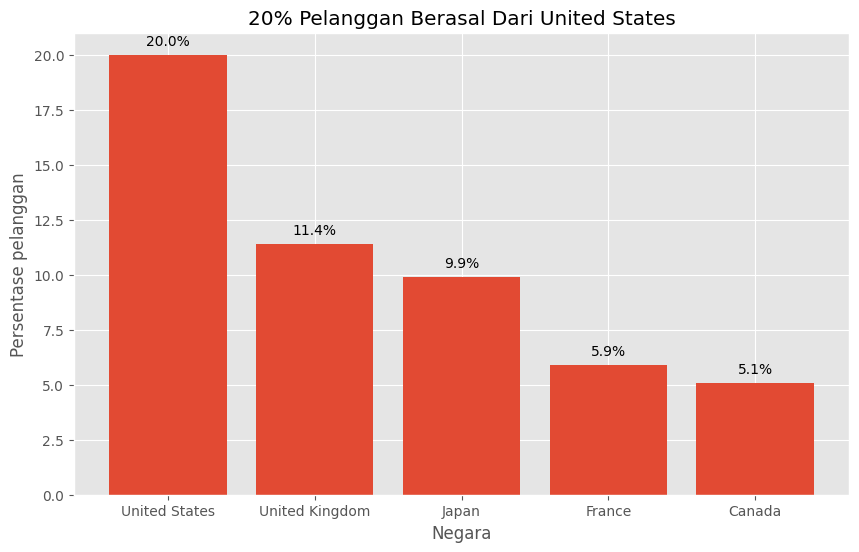

In [102]:
country_grup=df.groupby('Country')['Country'].count().to_frame().reset_index(names='country')
country_grup.rename(columns={'Country':'Jumlah'},inplace=True)
total=country_grup['Jumlah'].sum()
country_grup['Persentase']=round((country_grup['Jumlah']/total)*100,1)
country_grup=country_grup.sort_values('Persentase',ascending=False).reset_index().head(5)
country_grup.drop(columns='index',inplace=True)

plt.figure(figsize=(10,6))
plt.bar(country_grup['country'],country_grup['Persentase'])
# Menambahkan nilai di atas setiap batang
for i, value in enumerate(country_grup['Persentase']):
    plt.text(i, value + 0.3, f"{value}%", ha='center', va='bottom', fontsize=10, color='black')

plt.title('20% Pelanggan Berasal Dari United States')
plt.xlabel('Negara')
plt.ylabel('Persentase pelanggan')

plt.show()

5 negara dengan jumlah pembeli terbanyak yaitu terdiri dari united states, united kingdom, japan,france,canada. dan 20% pembeli berasal dari united states

setelah negara kemudian industri apa yang merupakan pembeli terbanyak perusahaan 

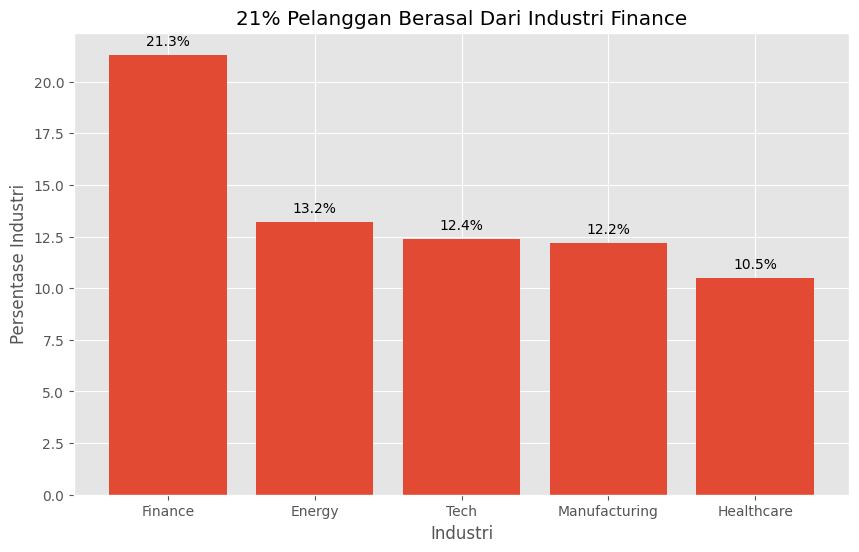

In [103]:
industry_grup=df.groupby('Industry')['Industry'].count().to_frame().reset_index(names='industry')
industry_grup.rename(columns={'Industry':'Jumlah'},inplace=True)
total=industry_grup['Jumlah'].sum()
industry_grup['Persentase']=round((industry_grup['Jumlah']/total)*100,1)
industry_grup=industry_grup.sort_values('Persentase',ascending=False).reset_index().head(5)
industry_grup.drop(columns='index',inplace=True)

plt.figure(figsize=(10,6))
plt.bar(industry_grup['industry'],industry_grup['Persentase'])
# Menambahkan nilai di atas setiap batang
for i, value in enumerate(industry_grup['Persentase']):
    plt.text(i, value +0.3, f"{value}%", ha='center', va='bottom', fontsize=10, color='black')

plt.title('21% Pelanggan Berasal Dari Industri Finance')
plt.xlabel('Industri')
plt.ylabel('Persentase Industri')
plt.show()

segment finance merupakan segment dengan jumlah pembeli terbanyak yaitu sebesar 21%. setelah mengetahui segment yang paling banyak membeli produk perusahaan kita perlu juga mengetahui customer mana yang merupakan pembeli terbanyak produk kita

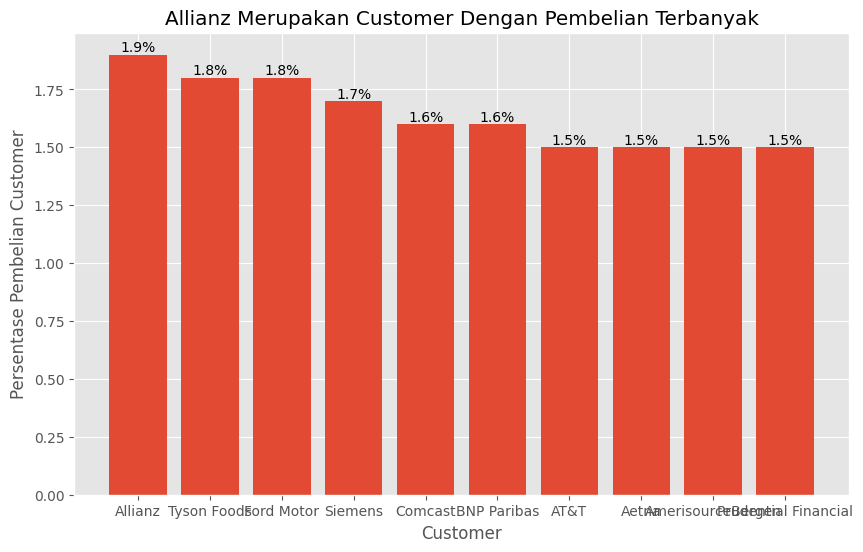

In [104]:
customer_grup=df.groupby('Customer')['Customer'].count().to_frame().reset_index(names='customer')
customer_grup.rename(columns={'Customer':'Jumlah'},inplace=True)
total=customer_grup['Jumlah'].sum()
customer_grup['Persentase']=round((customer_grup['Jumlah']/total)*100,1)
customer_grup=customer_grup.sort_values('Persentase',ascending=False).reset_index().head(10)
customer_grup.drop(columns='index',inplace=True)

plt.figure(figsize=(10,6))
plt.bar(customer_grup['customer'],customer_grup['Persentase'])
# Menambahkan nilai di atas setiap batang
for i, value in enumerate(customer_grup['Persentase']):
    plt.text(i, value , f"{value}%", ha='center', va='bottom', fontsize=10, color='black')

plt.title('Allianz Merupakan Customer Dengan Pembelian Terbanyak')
plt.xlabel('Customer')
plt.ylabel('Persentase Pembelian Customer')
plt.show()

Dari segmentasi berdasarkan segment industri,regional, negara, industri maka kita dapat menentukan strategi promosi sehingga startegi yang diterapkan lebih tepat sasaran.

## KESIMPULAN DAN REKOMENDASI
Dari hasil analisis diatas kita bisa membuat kesimpulan sebagai berikut:
* Sales dan profit pada 2023 mengalami peningkatan
* Profit margin pada 2023 mengalami penurunan 
* Sales tertinggi pada 2023 diperoleh dari produk Contact Matcher 
* Profit tertinggi pada 2023 diperoleh dari produk Alchemi
* Pemberian diskon tidak berkorelasi dengan sales dan berkorelasi negatif dengan profit
* 52% Pembeli berasal dari segment SMB
* 80% Pembeli berasal dari regional AMER dan EMEA Masing masing 43% dan 37%
* 21% Pembeli Berasal dari industry Finance

## Rangkuman Keseluruhan
* Profit negatif disumbangkan oleh 3 produk. Produk dengan profit negatif, yang berarti biaya operasional melebihi pendapatan dari penjualan produk tersebut hal ini dapat berdampak signifikan terhadap penurunan profit margin perusahaan secara keseluruhan. Ketika sebuah produk tidak menghasilkan keuntungan atau malah merugi, ini mengurangi total laba bersih yang dapat dikontribusikan ke profit margin perusahaan.
* Tidak adanya korelasi antara pemberian diskon dengan sales menunjukkan ada atau tidaknya diskon tidak berpengaruh pada sales, sehingga perlu dilakukan startegi promosi yang lain untuk meningkatkan sales.
* Korelasi antara profit dan diskon untuk produk dengan profit negatif memiliki korelasi negatif yang artinya semakin besar pemberian diskon maka profitnya semakin kecil. sehingga perlu dilakukan perhitungan ulang dalam penetapan discount jika ingin tetap menggunakan startegi pemberian diskon.
* Pemberian diskon lebih dari 20% menyebabkan profit negatif pada produk Big OI Database,Contact Matcher, dan Marketing Suite
* Terdapat 9 Negara dengan profit negatif sehingga perlu dilakukan perhitungan ulang harga dan startegi promosi dengan mempertimbangkan situasi dan kondisi disetiap negara
* Segment pembeli didominasi oleh segment SMB sebesar 50%, sehingga dapat dilakukan strategi pemasaran yang lebih baik untuk mengoptimalkan penjualan pada segment ini.


## Rekomendasi:
1. Tidak ada korelasi antara diskon dan sales sehingga perlu startegi promosi lain selain diskon untuk meningkatkan sales dan profit perusahaan. 
2. Jika ingin menggunakan startegi diskon perhatikan kembali segment yang potensial untuk diberikan diskon seperti segment SMB dan pada industri finance yang merupakan segment pembeli terbanyak. atau pemberian diskon jika memenuhi persyaratan tertentu seperti minimal pembelian untuk menjaga loyalitas pelanggan.
3. Pemberian diskon tidak boleh lebih dari 20% dikarenakan dapat menghasilkan profit negatif pada perusahaan.Penyesuaian harga dan diskon juga harus disesuaikan dengan negara yang dimana terdapat biaya operasional serta pajak yang berbeda.
4. Melakukan kegiatan promosi ke negara dengan segment bisnis SMB terbanyak seperti India, Indonesia,Cina,Brasil,Meksiko, Italia, Prancis, Spanyol,German [di sini](https://www.statista.com/topics/8231/smes-in-europe/#topicOverview). 
5. strategi promosi pada segment SMB yang digunakan selain diskon yaitu dapat melakukan workshop yang langsung bertemu dengan calon pembeli dengan melakukan edukasi tentang pentingnya digitalisasi dalam bisnis, karena kebanykan segment SMB masih banyak yang belum sadar akan pentingnya digitalisasi usaha, dengan workshop ini kita dapat memberikan jawaban akan masalah-masalah yang dialami oleh pelaku usaha dengan produk yang kita miliki, sehingga pemilik usaha akan terpengaruhi untuk melakukan pembelian produk kita.
6. Memeberikan penawaran yang menarik tetapi tetap memperhatikan keuntungan profit pada regional AMER dan EMEA, kemudian pada industry finance, serta tetap menjalin hubungan baik dengan customer yang merupakan pembeli terbanyak seperti Allianz